In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely as shp
import matplotlib.patheffects as PathEffects
import seaborn as sns
% matplotlib inline

# Reading the datasets

In [2]:
y1 = pd.read_csv('./datasets_2/1437.csv')
y2 = pd.read_csv('./datasets_2/1438.csv')
y3 = pd.read_csv('./datasets_2/1439.csv')

y1.head()

,region,month,accidents including damages,accidents including injuries,accidents including mortalities,total number of accidents,injuries,mortalities,intact,total number of people involved in RTA
0,Al-Baha,Moharram,314.0,55.0,4.0,373.0,104.0,5.0,712.0,821.0
1,Al-Baha,Safar,462.0,65.0,11.0,538.0,136.0,15.0,1021.0,1172.0
2,Al-Baha,Rabeea Awal,360.0,48.0,11.0,419.0,107.0,15.0,759.0,881.0
3,Al-Baha,Rabeea Thany,304.0,32.0,8.0,344.0,74.0,9.0,630.0,713.0
4,Al-Baha,Jamad Awal,375.0,50.0,15.0,440.0,118.0,17.0,870.0,1005.0


In [3]:
y1.dropna(inplace=True)
y2.dropna(inplace=True)
y3.dropna(inplace=True)

### Local moran analysis

In [4]:
from esda.moran import Moran_Local
import libpysal.weights as weights

# Injuries Analysis

In [5]:
# monthly injuries datasets

In [6]:
inj_y1 = y1.pivot_table(index = 'region', columns = 'month', values = 'injuries')[['Moharram', 'Safar', 'Rabeea Awal', 'Rabeea Thany', 'Jamad Awal',
       'Jamad Thany', 'Ragab', ' Shaaban', ' Ramadan', ' Shawwal',
       'Zy Aqeaada', 'Zy Alhegga']].reset_index()
inj_y1

month,region,Moharram,Safar,Rabeea Awal,Rabeea Thany,Jamad Awal,Jamad Thany,Ragab,Shaaban,Ramadan,Shawwal,Zy Aqeaada,Zy Alhegga
0,Al-Baha,104.0,136.0,107.0,74.0,118.0,91.0,119.0,103.0,70.0,96.0,123.0,86.0
1,Al-Jouf,40.0,64.0,30.0,37.0,43.0,35.0,53.0,57.0,69.0,48.0,46.0,52.0
2,Al-Qurayyat,29.0,54.0,25.0,16.0,21.0,20.0,43.0,40.0,33.0,21.0,13.0,31.0
3,Ar Riyad,310.0,338.0,333.0,339.0,323.0,343.0,377.0,382.0,469.0,349.0,276.0,368.0
4,Aseer,236.0,191.0,220.0,224.0,185.0,180.0,191.0,223.0,205.0,236.0,222.0,228.0
5,Ash Sharqiyah,430.0,549.0,458.0,497.0,423.0,391.0,369.0,379.0,290.0,335.0,374.0,398.0
6,At-Taif,437.0,435.0,439.0,477.0,516.0,533.0,575.0,390.0,616.0,371.0,394.0,371.0
7,Hail,97.0,85.0,87.0,91.0,80.0,66.0,82.0,85.0,71.0,75.0,56.0,57.0
8,Jazan,203.0,184.0,210.0,184.0,199.0,176.0,195.0,239.0,170.0,162.0,155.0,182.0
9,Jiddah,319.0,365.0,331.0,324.0,310.0,324.0,244.0,308.0,297.0,308.0,303.0,282.0


In [7]:
inj_y2 = y2.pivot_table(index = 'region', columns = 'month', values = 'injuries')[['Moharram', 'Safar', 'Rabeea Awal', 'Rabeea Thany', 'Jamad Awal',
       'Jamad Thany', 'Ragab', ' Shaaban', ' Ramadan', ' Shawwal',
       'Zy Aqeaada', 'Zy Alhegga']].reset_index()
inj_y3 = y3.pivot_table(index = 'region', columns = 'month', values = 'injuries')[['Moharram', 'Safar', 'Rabeea Awal', 'Rabeea Thany', 'Jamad Awal',
       'Jamad Thany', 'Ragab', ' Shaaban', ' Ramadan', ' Shawwal',
       'Zy Aqeaada', 'Zy Alhegga']].reset_index()

In [8]:
#adding geometry to the datasets

In [9]:
overview = gpd.read_file('./overview.geojson')
overview.head()

,NAME,TOTPOP_CY,x,y,Total injuries,Total mortalities,Number of traffic accidents,Number of people involved in traffic accidents,Number of Accidents including damages,Number of Accidents including injuries,Number of Accidents including mortalities,Percentage of Accidents including damages,Percentage of Accidents including injuries,Percentage of Accidents including mortalities,Accidents per 1000 population,Involvment in traffic accidents per 1000 population,Injuries 1000 population,Mortalities per 1000 population,geometry
0,Makkah,3261577,-398222.616706,2.366203e+06,3400.0,609.0,44915.0,88472.0,43146.0,1311.0,458.0,96.061449,2.918847,1.019704,13.770946,27.125529,1.042441,0.186719,MULTIPOLYGON Z (((-456710.530 2650896.255 0.00...
1,Aseer,2264096,-352045.193083,2.127645e+06,2192.0,696.0,25964.0,50085.0,24608.0,771.0,585.0,94.777384,2.969496,2.253120,11.467712,22.121412,0.968157,0.307407,MULTIPOLYGON Z (((-308858.199 2319738.780 0.00...
2,Tabouk,962936,-698604.846811,3.091249e+06,977.0,293.0,10034.0,9905.0,9247.0,573.0,214.0,92.156667,5.710584,2.132749,10.420215,10.286250,1.014605,0.304278,MULTIPOLYGON Z (((-789203.443 3344744.803 0.00...
3,Jazan,1643752,-377562.520722,1.923485e+06,2112.0,563.0,19572.0,33268.0,18046.0,1098.0,428.0,92.203147,5.610055,2.186797,11.906906,20.239063,1.284865,0.342509,MULTIPOLYGON Z (((-419719.167 1993300.107 0.00...
4,Al-Baha,500452,-509430.926111,2.256117e+06,935.0,111.0,1764.0,3918.0,1193.0,490.0,81.0,67.630385,27.777778,4.591837,3.524814,7.828923,1.868311,0.221799,"POLYGON Z ((-497258.929 2331363.256 0.000, -49..."


In [10]:
inj_y1 = pd.merge(overview[['NAME','TOTPOP_CY','geometry']],inj_y1,
         left_on= 'NAME', right_on='region', right_index=False).drop(columns = 'region')
inj_y2 = pd.merge(overview[['NAME','TOTPOP_CY','geometry']],inj_y2,
         left_on= 'NAME', right_on='region', right_index=False).drop(columns = 'region')
inj_y3 = pd.merge(overview[['NAME','TOTPOP_CY','geometry']],inj_y3,
         left_on= 'NAME', right_on='region', right_index=False).drop(columns = 'region')

## Total number of injuries

### cross-sectional

In [11]:
y1.month.unique()

array(['Moharram', 'Safar', 'Rabeea Awal', 'Rabeea Thany', 'Jamad Awal',
       'Jamad Thany', 'Ragab', ' Shaaban', ' Ramadan', ' Shawwal',
       'Zy Aqeaada', 'Zy Alhegga'], dtype=object)

In [12]:
months = ['Moharram', 'Safar', 'Rabeea Awal',
       'Rabeea Thany', 'Jamad Awal', 'Jamad Thany', 'Ragab', ' Shaaban',
       ' Ramadan', ' Shawwal', 'Zy Aqeaada', 'Zy Alhegga']

In [13]:
np.random.seed(1992)
w = weights.Kernel.from_dataframe(inj_y1, k=5, fixed = False, function = 'gaussian')
w.transform = 'r'

injuries_all = inj_y1[['NAME','geometry']].copy()

for month in months:
    for n,year in zip([1437,1438,1439],[inj_y1,inj_y2,inj_y3]):
        y = year[month].values
        moran_loc = Moran_Local(y, w)
        injuries_all['clustering'] = moran_loc.q
        injuries_all['p_sim'] = moran_loc.p_sim
        column = month + ' ' + str(n)
        injuries_all[column]= injuries_all['clustering'].map({1: 'HH', 2: 'LH', 3: 'LL', 4: 'HL'})
        injuries_all.loc[ (injuries_all.p_sim > 0.05) , column]= 'NS' 

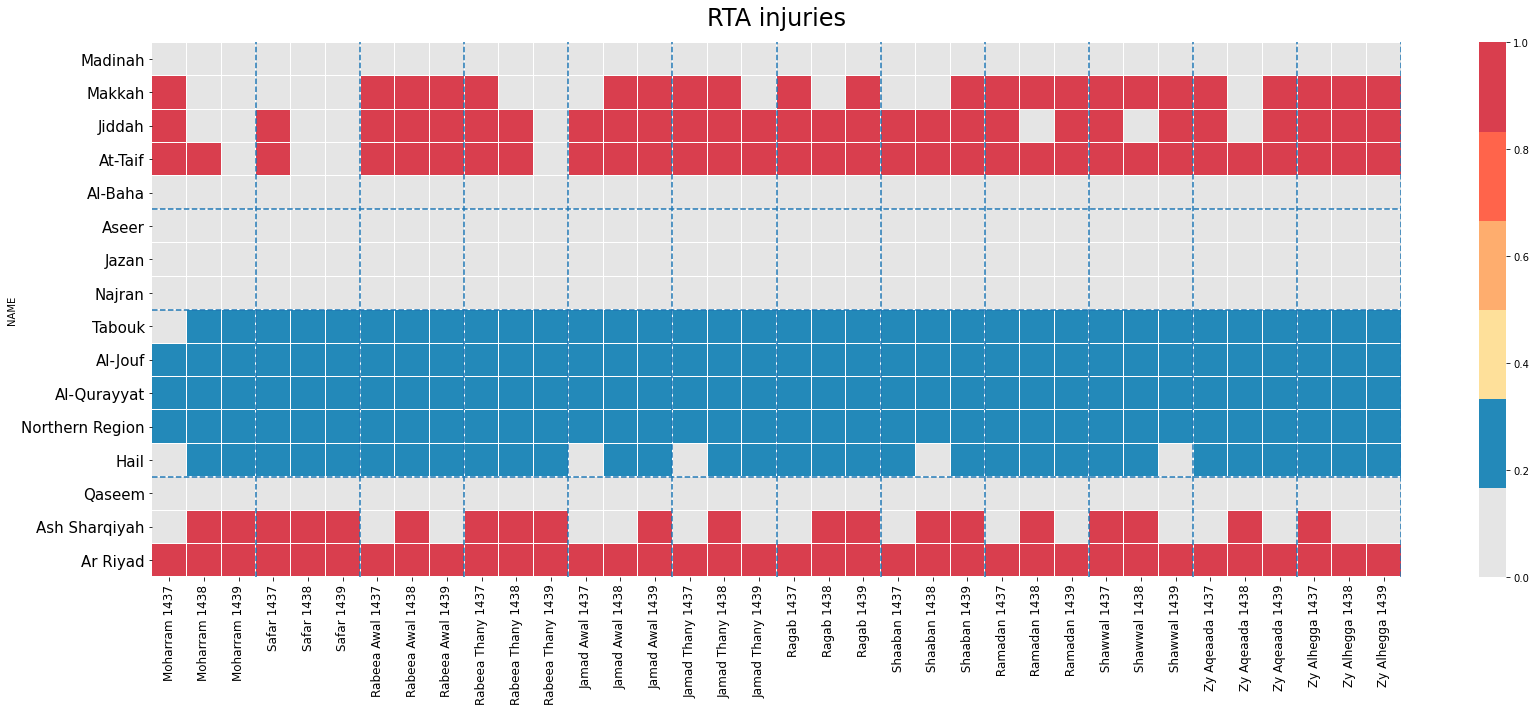

In [14]:
heatmap_df= injuries_all.drop(columns = ['geometry','clustering','p_sim']).copy()
heatmap_df.set_index('NAME', inplace = True)
heatmap_df.replace("NS",0, inplace = True)
heatmap_df.replace("LL",0.25, inplace = True)
heatmap_df.replace("LH",0.05, inplace = True)
heatmap_df.replace("HL",0.75, inplace = True)
heatmap_df.replace("HH",1.0, inplace = True)
heatmap_df = heatmap_df.loc[['Madinah','Makkah','Jiddah','At-Taif', 'Al-Baha','Aseer', 'Jazan', 'Najran','Tabouk', 
         'Al-Jouf', 'Al-Qurayyat', 'Northern Region','Hail','Qaseem','Ash Sharqiyah','Ar Riyad'],:]

colors = ["#e5e5e5","#2389b9", "#fee09a" , "#fead6e" , "#ff644b" , "#d93e4e"]
fig,ax = plt.subplots(figsize = (2*12,10),facecolor='w')
sns.heatmap(heatmap_df, ax=ax, cmap = sns.color_palette(colors), linewidths=0.01, linecolor="w",cbar=True)

for i in np.arange(3,37,3):
    plt.axvline(i, linestyle = '--')

plt.axhline(5, linestyle = '--')
plt.axhline(8, linestyle = '--')
plt.axhline(13, linestyle = '--')
    
ax.set_title('RTA injuries', size = 24, y = 1.02)
ax.set_xticklabels(ax.get_xticklabels() , size = 12)
ax.set_yticklabels(ax.get_yticklabels() , size = 15)

plt.tight_layout()
plt.savefig('./output/heatmaps/5n_RTA injuries.jpg', dpi=300)

### linear

In [15]:
year = 1437
linear = []
while year <1440:
    for month in months:
        linear.append(month+' '+ str(year))
    year +=1
    
heatmap_df_linear = heatmap_df[linear]

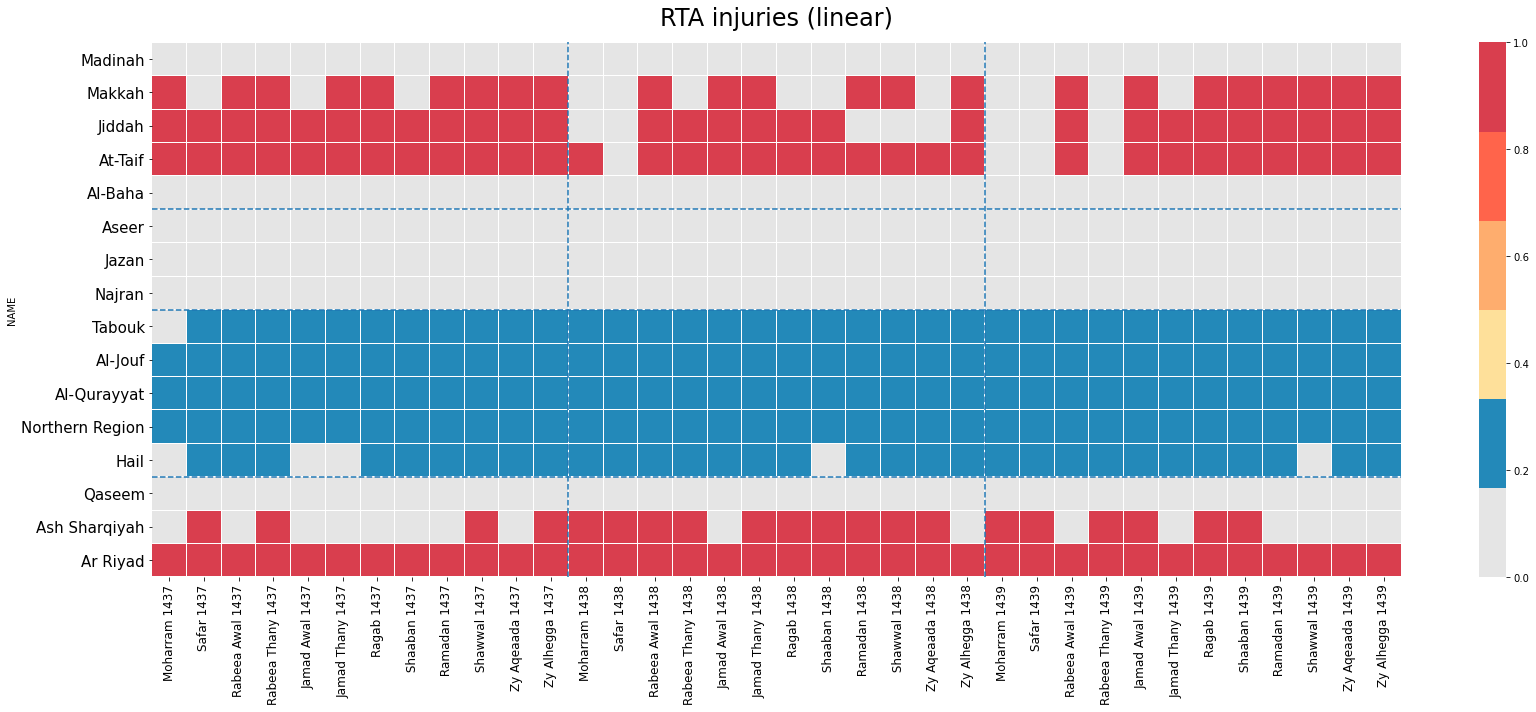

In [16]:
colors = ["#e5e5e5","#2389b9", "#fee09a" , "#fead6e" , "#ff644b" , "#d93e4e"]
fig,ax = plt.subplots(figsize = (2*12,10),facecolor='w')
sns.heatmap(heatmap_df_linear, ax=ax, cmap = sns.color_palette(colors), linewidths=0.01, linecolor="w",cbar=True)
plt.axvline(12, linestyle = '--')
plt.axvline(24, linestyle = '--')

plt.axhline(5, linestyle = '--')
plt.axhline(8, linestyle = '--')
plt.axhline(13, linestyle = '--')

ax.set_title('RTA injuries (linear)', size = 24, y = 1.02)
ax.set_xticklabels(ax.get_xticklabels() , size = 12)
ax.set_yticklabels(ax.get_yticklabels() , size = 15)

plt.tight_layout()
plt.savefig('./output/heatmaps/5n_RTA injuries_linear.jpg', dpi=300)

## Injuries Per capita

### cross-sectional

In [17]:
inj_y1_pc = inj_y1.copy()
inj_y2_pc = inj_y2.copy()
inj_y3_pc = inj_y3.copy()

In [18]:
for i in np.arange(3,15):
    inj_y1_pc.iloc[:,i] = (inj_y1_pc.iloc[:,i]/ (inj_y1_pc.TOTPOP_CY))*100000
    inj_y2_pc.iloc[:,i] = (inj_y2_pc.iloc[:,i]/ (inj_y2_pc.TOTPOP_CY))*100000
    inj_y3_pc.iloc[:,i] = (inj_y3_pc.iloc[:,i]/ (inj_y3_pc.TOTPOP_CY))*100000

In [19]:
months = ['Moharram', 'Safar', 'Rabeea Awal',
       'Rabeea Thany', 'Jamad Awal', 'Jamad Thany', 'Ragab', ' Shaaban',
       ' Ramadan', ' Shawwal', 'Zy Aqeaada', 'Zy Alhegga']

np.random.seed(1992)
w = weights.Kernel.from_dataframe(inj_y1, k=5, fixed = False, function = 'gaussian')
w.transform = 'r'

injuries_all = inj_y1[['NAME','geometry']].copy()

for month in months:
    for n,year in zip([1437,1438,1439],[inj_y1_pc,inj_y2_pc,inj_y3_pc]):
        y = year[month].values
        moran_loc = Moran_Local(y, w )
        injuries_all['clustering'] = moran_loc.q
        injuries_all['p_sim'] = moran_loc.p_sim
        column = month + ' ' + str(n)
        injuries_all[column]= injuries_all['clustering'].map({1: 'HH', 2: 'LH', 3: 'LL', 4: 'HL'})
        injuries_all.loc[ (injuries_all.p_sim > 0.05) , column]= 'NS' 

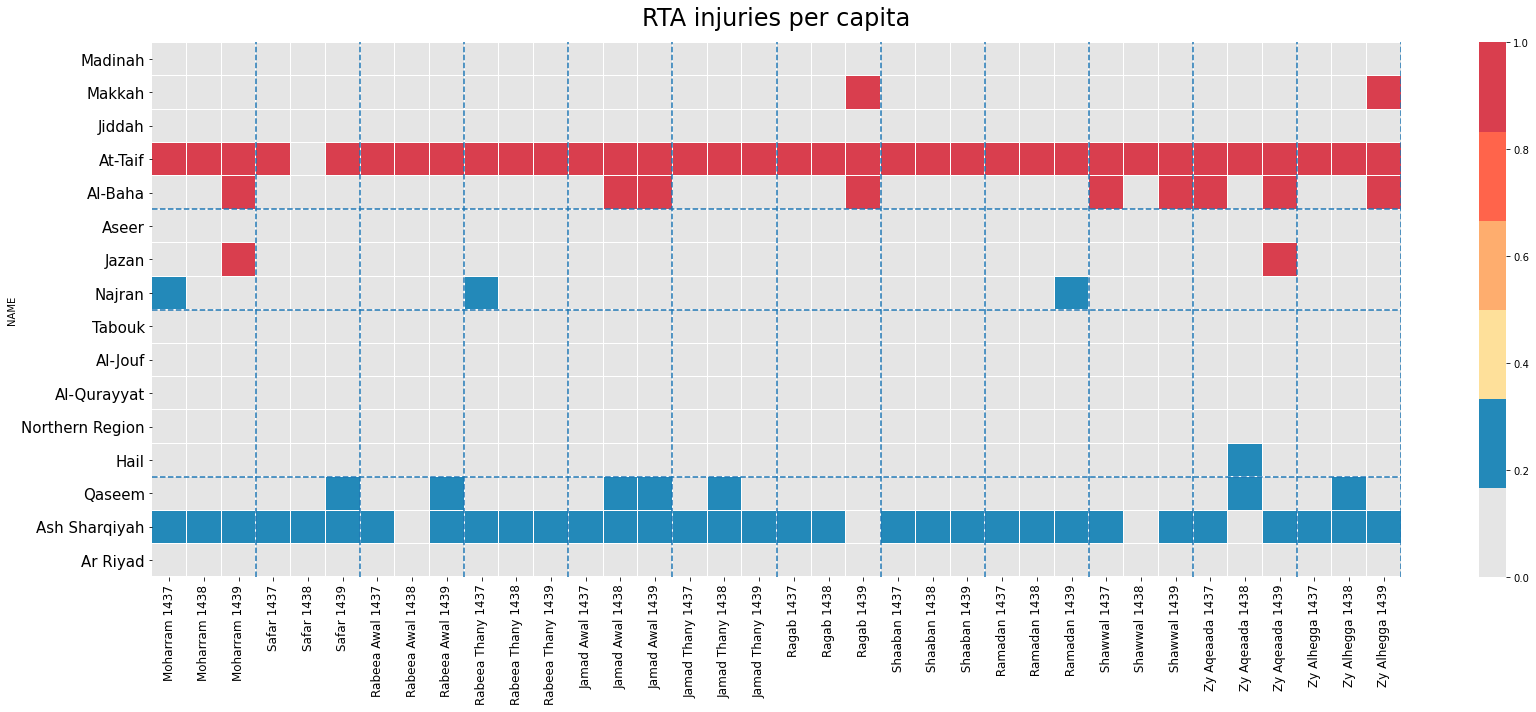

In [20]:
heatmap_df= injuries_all.drop(columns = ['geometry','clustering','p_sim']).copy()
heatmap_df.set_index('NAME', inplace = True)
heatmap_df.replace("NS",0, inplace = True)
heatmap_df.replace("LL",0.25, inplace = True)
heatmap_df.replace("LH",0.05, inplace = True)
heatmap_df.replace("HL",0.75, inplace = True)
heatmap_df.replace("HH",1.0, inplace = True)
heatmap_df = heatmap_df.loc[['Madinah','Makkah','Jiddah','At-Taif', 'Al-Baha','Aseer', 'Jazan', 'Najran','Tabouk', 
         'Al-Jouf', 'Al-Qurayyat', 'Northern Region','Hail','Qaseem','Ash Sharqiyah','Ar Riyad'],:]

colors = ["#e5e5e5","#2389b9", "#fee09a" , "#fead6e" , "#ff644b" , "#d93e4e"]
fig,ax = plt.subplots(figsize = (2*12,10),facecolor='w')
sns.heatmap(heatmap_df, ax=ax, cmap = sns.color_palette(colors), linewidths=0.01, linecolor="w",cbar=True)
for i in np.arange(3,37,3):
    plt.axvline(i, linestyle = '--')

plt.axhline(5, linestyle = '--')
plt.axhline(8, linestyle = '--')
plt.axhline(13, linestyle = '--')
    
ax.set_title('RTA injuries per capita', size = 24, y = 1.02)
ax.set_xticklabels(ax.get_xticklabels() , size = 12)
ax.set_yticklabels(ax.get_yticklabels() , size = 15)

plt.tight_layout()
plt.savefig('./output/heatmaps/5n_RTA injuries per capita.jpg', dpi=300)

### linear

In [21]:
year = 1437
linear = []
while year <1440:
    for month in months:
        linear.append(month+' '+ str(year))
    year +=1
    
heatmap_df_linear = heatmap_df[linear]

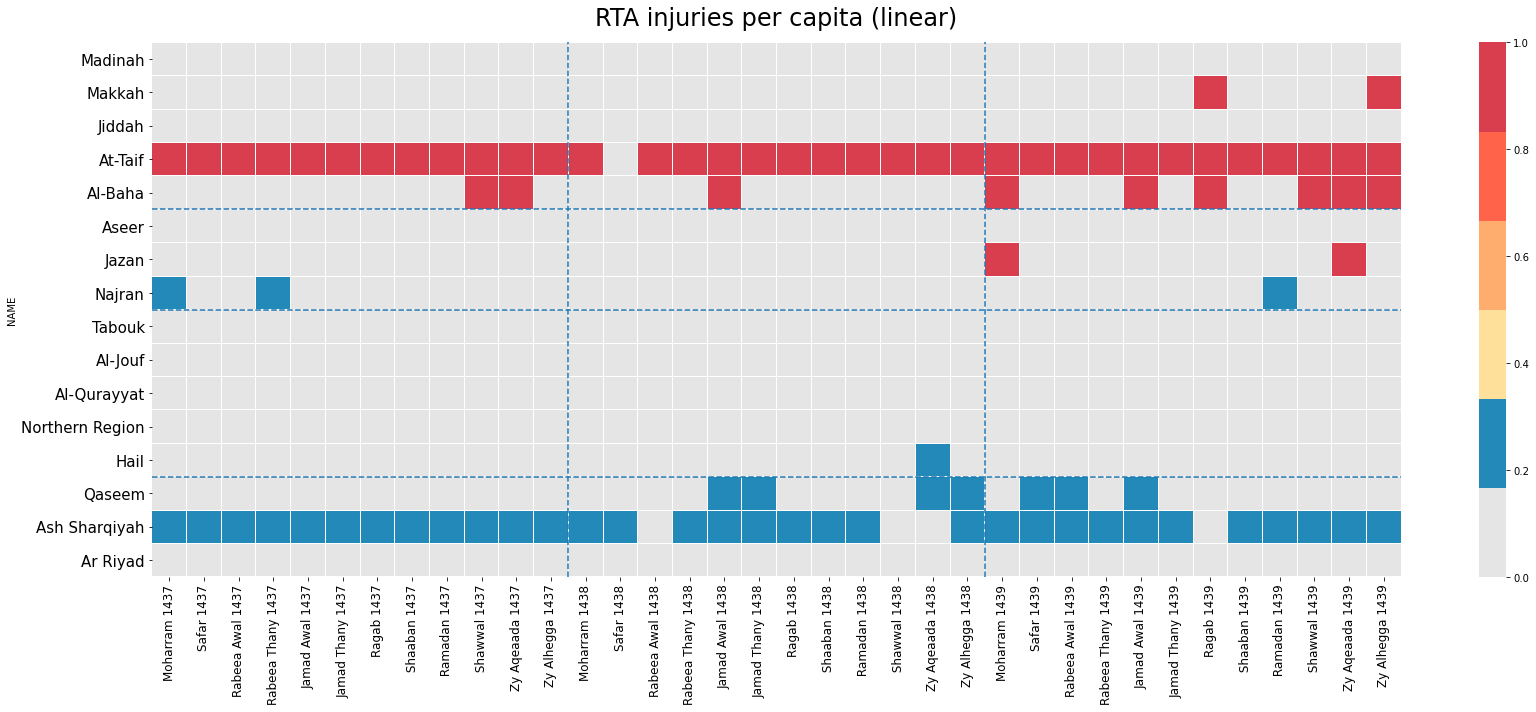

In [22]:
colors = ["#e5e5e5","#2389b9", "#fee09a" , "#fead6e" , "#ff644b" , "#d93e4e"]
fig,ax = plt.subplots(figsize = (2*12,10),facecolor='w')
sns.heatmap(heatmap_df_linear, ax=ax, cmap = sns.color_palette(colors), linewidths=0.01, linecolor="w",cbar=True)
plt.axvline(12, linestyle = '--')
plt.axvline(24, linestyle = '--')

plt.axhline(5, linestyle = '--')
plt.axhline(8, linestyle = '--')
plt.axhline(13, linestyle = '--')

ax.set_title('RTA injuries per capita (linear)', size = 24, y = 1.02)
ax.set_xticklabels(ax.get_xticklabels() , size = 12)
ax.set_yticklabels(ax.get_yticklabels() , size = 15)

plt.tight_layout()
plt.savefig('./output/heatmaps/5n_RTA injuries per capita_linear.jpg', dpi=300)

# Monthly mortalities

# Perparing the dataset

In [23]:
#creaing the datasets
mort_y1 = y1.pivot_table(index = 'region', columns = 'month', values = 'mortalities')[['Moharram', 'Safar', 'Rabeea Awal', 'Rabeea Thany', 'Jamad Awal',
       'Jamad Thany', 'Ragab', ' Shaaban', ' Ramadan', ' Shawwal',
       'Zy Aqeaada', 'Zy Alhegga']].reset_index()
mort_y2 = y2.pivot_table(index = 'region', columns = 'month', values = 'mortalities')[['Moharram', 'Safar', 'Rabeea Awal', 'Rabeea Thany', 'Jamad Awal',
       'Jamad Thany', 'Ragab', ' Shaaban', ' Ramadan', ' Shawwal',
       'Zy Aqeaada', 'Zy Alhegga']].reset_index()
mort_y3 = y3.pivot_table(index = 'region', columns = 'month', values = 'mortalities')[['Moharram', 'Safar', 'Rabeea Awal', 'Rabeea Thany', 'Jamad Awal',
       'Jamad Thany', 'Ragab', ' Shaaban', ' Ramadan', ' Shawwal',
       'Zy Aqeaada', 'Zy Alhegga']].reset_index()

In [24]:
#adding goemetry to the datasets
overview = gpd.read_file('./overview.geojson')
mort_y1 = pd.merge(overview[['NAME','TOTPOP_CY','geometry']],mort_y1,
         left_on= 'NAME', right_on='region', right_index=False).drop(columns = 'region')
mort_y2 = pd.merge(overview[['NAME','TOTPOP_CY','geometry']],mort_y2,
         left_on= 'NAME', right_on='region', right_index=False).drop(columns = 'region')
mort_y3 = pd.merge(overview[['NAME','TOTPOP_CY','geometry']],mort_y3,
         left_on= 'NAME', right_on='region', right_index=False).drop(columns = 'region')

# Mortalities heatmap

## Total number

### cross-sectional

In [25]:
months = ['Moharram', 'Safar', 'Rabeea Awal',
       'Rabeea Thany', 'Jamad Awal', 'Jamad Thany', 'Ragab', ' Shaaban',
       ' Ramadan', ' Shawwal', 'Zy Aqeaada', 'Zy Alhegga']

In [26]:
np.random.seed(1992)
w = weights.Kernel.from_dataframe(mort_y1, k=5, fixed = False, function = 'gaussian')
w.transform = 'r'

mortalities_all = mort_y1[['NAME','geometry']].copy()

for month in months:
    for n,year in zip([1437,1438,1439],[mort_y1,mort_y2,mort_y3]):
        y = year[month].values
        moran_loc = Moran_Local(y, w)
        mortalities_all['clustering'] = moran_loc.q
        mortalities_all['p_sim'] = moran_loc.p_sim
        column = month + ' ' + str(n)
        mortalities_all[column]= mortalities_all['clustering'].map({1: 'HH', 2: 'LH', 3: 'LL', 4: 'HL'})
        mortalities_all.loc[ (mortalities_all.p_sim > 0.05) , column]= 'NS' 

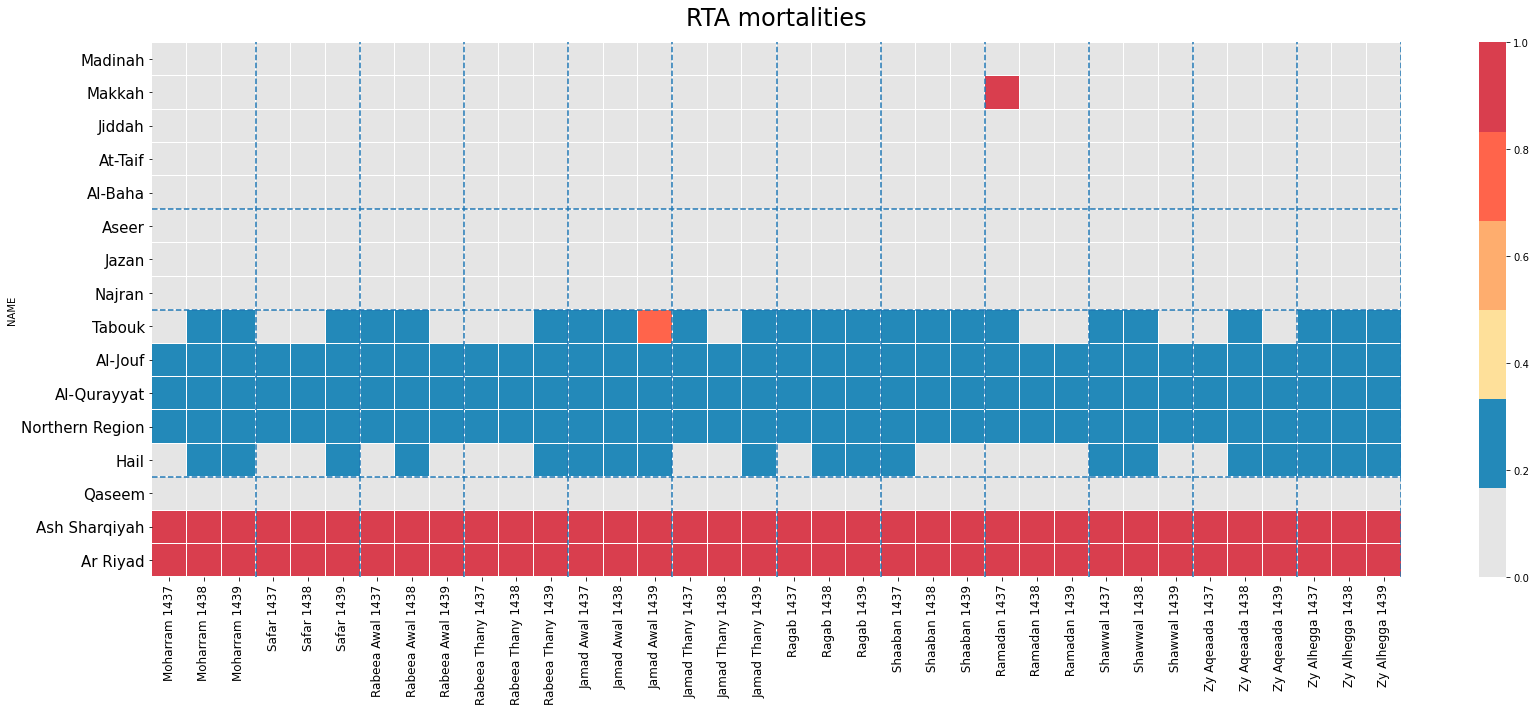

In [27]:
heatmap_df= mortalities_all.drop(columns = ['geometry','clustering','p_sim']).copy()
heatmap_df.set_index('NAME', inplace = True)
heatmap_df.replace("NS",0, inplace = True)
heatmap_df.replace("LL",0.25, inplace = True)
heatmap_df.replace("LH",0.05, inplace = True)
heatmap_df.replace("HL",0.75, inplace = True)
heatmap_df.replace("HH",1.0, inplace = True)
heatmap_df = heatmap_df.loc[['Madinah','Makkah','Jiddah','At-Taif', 'Al-Baha','Aseer', 'Jazan', 'Najran','Tabouk', 
         'Al-Jouf', 'Al-Qurayyat', 'Northern Region','Hail','Qaseem','Ash Sharqiyah','Ar Riyad'],:]

colors = ["#e5e5e5","#2389b9", "#fee09a" , "#fead6e" , "#ff644b" , "#d93e4e"]
fig,ax = plt.subplots(figsize = (2*12,10),facecolor='w')
sns.heatmap(heatmap_df, ax=ax, cmap = sns.color_palette(colors), linewidths=0.01, linecolor="w",cbar=True)

for i in np.arange(3,37,3):
    plt.axvline(i, linestyle = '--')

plt.axhline(5, linestyle = '--')
plt.axhline(8, linestyle = '--')
plt.axhline(13, linestyle = '--')
    
ax.set_title('RTA mortalities', size = 24, y = 1.02)
ax.set_xticklabels(ax.get_xticklabels() , size = 12)
ax.set_yticklabels(ax.get_yticklabels() , size = 15)

plt.tight_layout()
plt.savefig('./output/heatmaps/5n_RTA mortalities.jpg', dpi=300)

### linear

In [28]:
year = 1437
linear = []
while year <1440:
    for month in months:
        linear.append(month+' '+ str(year))
    year +=1
    
heatmap_df_linear = heatmap_df[linear]

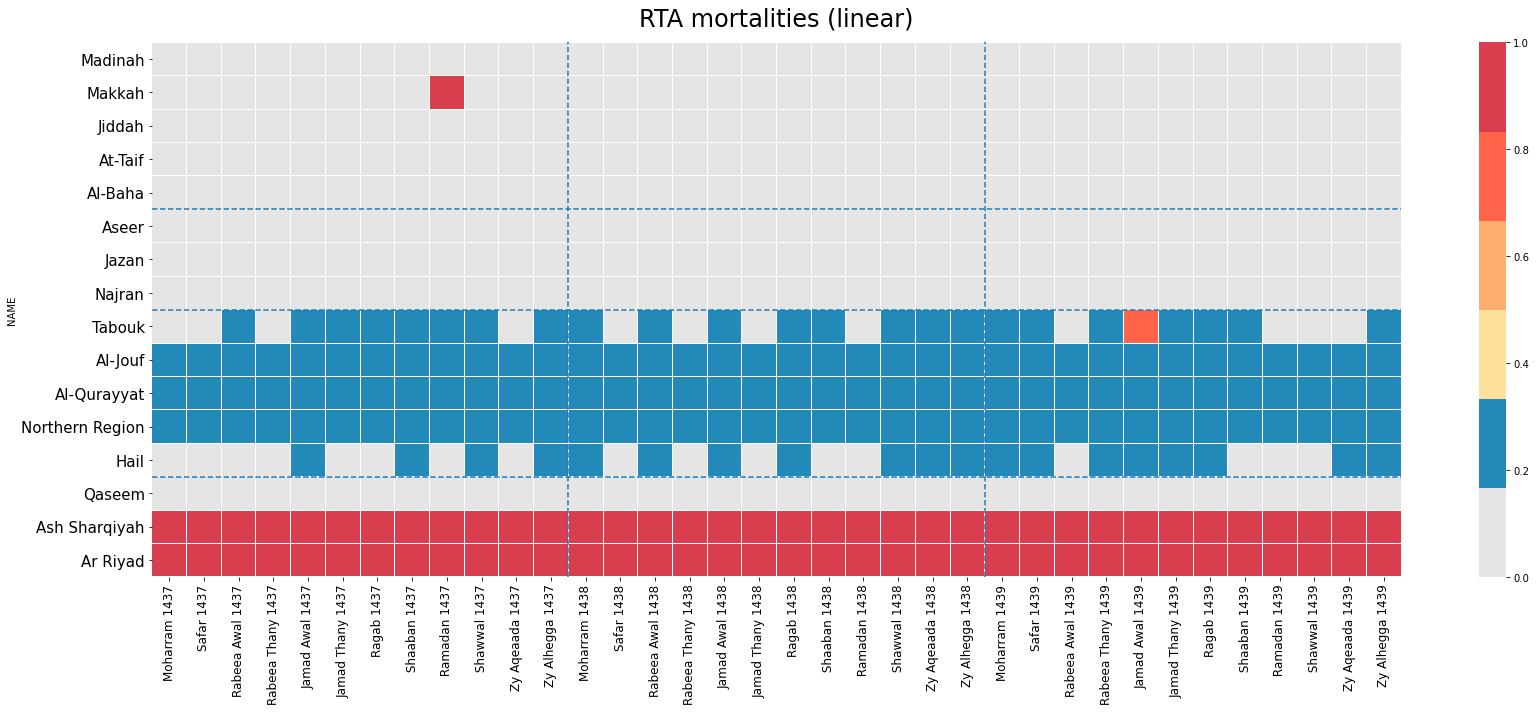

In [29]:
colors = ["#e5e5e5","#2389b9", "#fee09a" , "#fead6e" , "#ff644b" , "#d93e4e"]
fig,ax = plt.subplots(figsize = (2*12,10),facecolor='w')
sns.heatmap(heatmap_df_linear, ax=ax, cmap = sns.color_palette(colors), linewidths=0.01, linecolor="w",cbar=True)
plt.axvline(12, linestyle = '--')
plt.axvline(24, linestyle = '--')

plt.axhline(5, linestyle = '--')
plt.axhline(8, linestyle = '--')
plt.axhline(13, linestyle = '--')

ax.set_title('RTA mortalities (linear)', size = 24, y = 1.02)
ax.set_xticklabels(ax.get_xticklabels() , size = 12)
ax.set_yticklabels(ax.get_yticklabels() , size = 15)

plt.tight_layout()
plt.savefig('./output/heatmaps/5n_RTA mortalities_linear.jpg', dpi=300)

## Mortalities Per capita

### corssectional

In [30]:
#creating the datasets
mort_y1_pc = mort_y1.copy()
mort_y2_pc = mort_y2.copy()
mort_y3_pc = mort_y3.copy()

#preparing the values so it is per 100,000 population
for i in np.arange(3,15):
    mort_y1_pc.iloc[:,i] = (mort_y1_pc.iloc[:,i]/ (mort_y1_pc.TOTPOP_CY))*100000
    mort_y2_pc.iloc[:,i] = (mort_y2_pc.iloc[:,i]/ (mort_y2_pc.TOTPOP_CY))*100000
    mort_y3_pc.iloc[:,i] = (mort_y3_pc.iloc[:,i]/ (mort_y3_pc.TOTPOP_CY))*100000

In [31]:
months = ['Moharram', 'Safar', 'Rabeea Awal',
       'Rabeea Thany', 'Jamad Awal', 'Jamad Thany', 'Ragab', ' Shaaban',
       ' Ramadan', ' Shawwal', 'Zy Aqeaada', 'Zy Alhegga']

np.random.seed(1992)
w = weights.Kernel.from_dataframe(mort_y1, k=5, fixed = False, function = 'gaussian')
w.transform = 'r'

mortalities_all = mort_y1[['NAME','geometry']].copy()

for month in months:
    for n,year in zip([1437,1438,1439],[mort_y1_pc,mort_y2_pc,mort_y3_pc]):
        y = year[month].values
        moran_loc = Moran_Local(y, w )
        mortalities_all['clustering'] = moran_loc.q
        mortalities_all['p_sim'] = moran_loc.p_sim
        column = month + ' ' + str(n)
        mortalities_all[column]= mortalities_all['clustering'].map({1: 'HH', 2: 'LH', 3: 'LL', 4: 'HL'})
        mortalities_all.loc[ (mortalities_all.p_sim > 0.05) , column]= 'NS' 

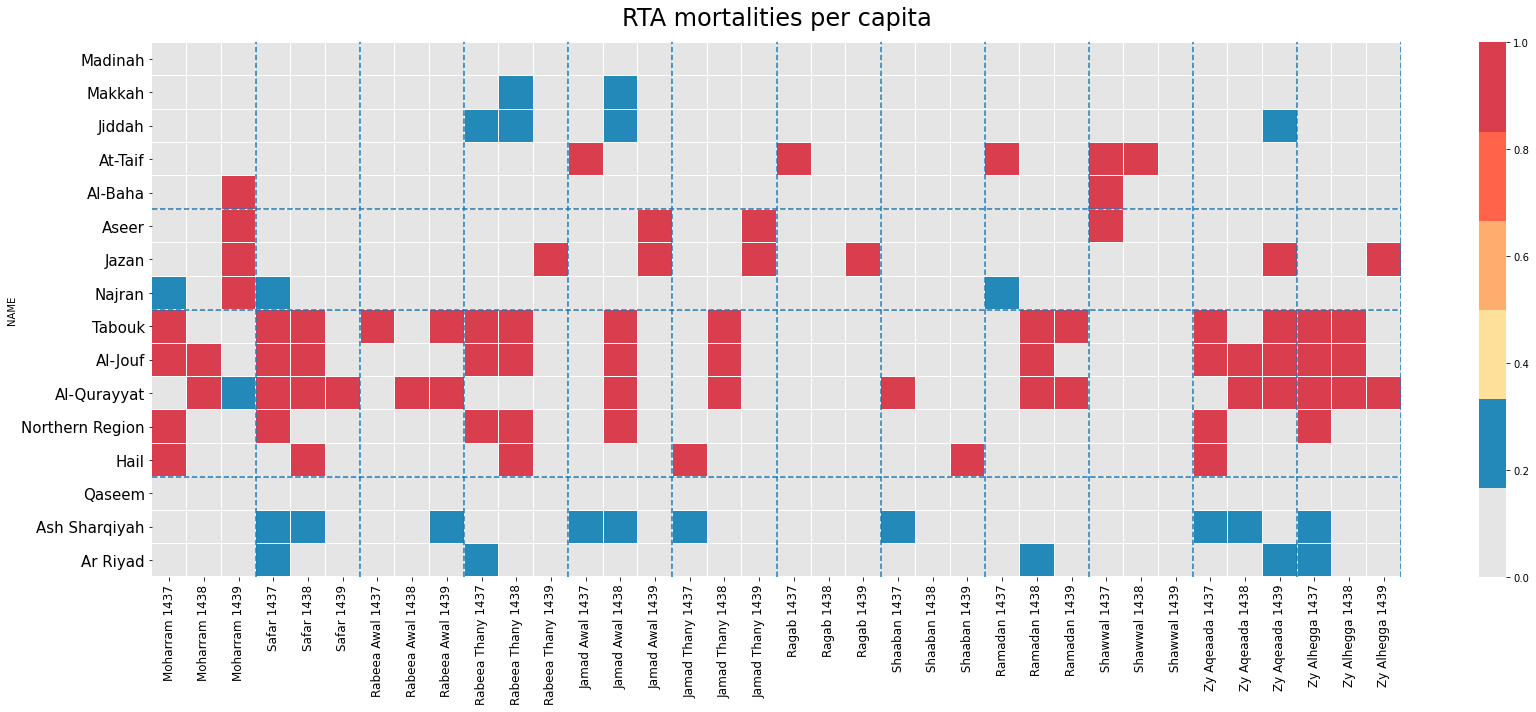

In [32]:
heatmap_df= mortalities_all.drop(columns = ['geometry','clustering','p_sim']).copy()
heatmap_df.set_index('NAME', inplace = True)
heatmap_df.replace("NS",0, inplace = True)
heatmap_df.replace("LL",0.25, inplace = True)
heatmap_df.replace("LH",0.05, inplace = True)
heatmap_df.replace("HL",0.75, inplace = True)
heatmap_df.replace("HH",1.0, inplace = True)
heatmap_df = heatmap_df.loc[['Madinah','Makkah','Jiddah','At-Taif', 'Al-Baha','Aseer', 'Jazan', 'Najran','Tabouk', 
         'Al-Jouf', 'Al-Qurayyat', 'Northern Region','Hail','Qaseem','Ash Sharqiyah','Ar Riyad'],:]

colors = ["#e5e5e5","#2389b9", "#fee09a" , "#fead6e" , "#ff644b" , "#d93e4e"]
fig,ax = plt.subplots(figsize = (2*12,10),facecolor='w')
sns.heatmap(heatmap_df, ax=ax, cmap = sns.color_palette(colors), linewidths=0.01, linecolor="w",cbar=True)
for i in np.arange(3,37,3):
    plt.axvline(i, linestyle = '--')

plt.axhline(5, linestyle = '--')
plt.axhline(8, linestyle = '--')
plt.axhline(13, linestyle = '--')
    
ax.set_title('RTA mortalities per capita', size = 24, y = 1.02)
ax.set_xticklabels(ax.get_xticklabels() , size = 12)
ax.set_yticklabels(ax.get_yticklabels() , size = 15)

plt.tight_layout()
plt.savefig('./output/heatmaps/5n_RTA mortalities per capita.jpg', dpi=300)

### linear

In [33]:
year = 1437
linear = []
while year <1440:
    for month in months:
        linear.append(month+' '+ str(year))
    year +=1
    
heatmap_df_linear = heatmap_df[linear]

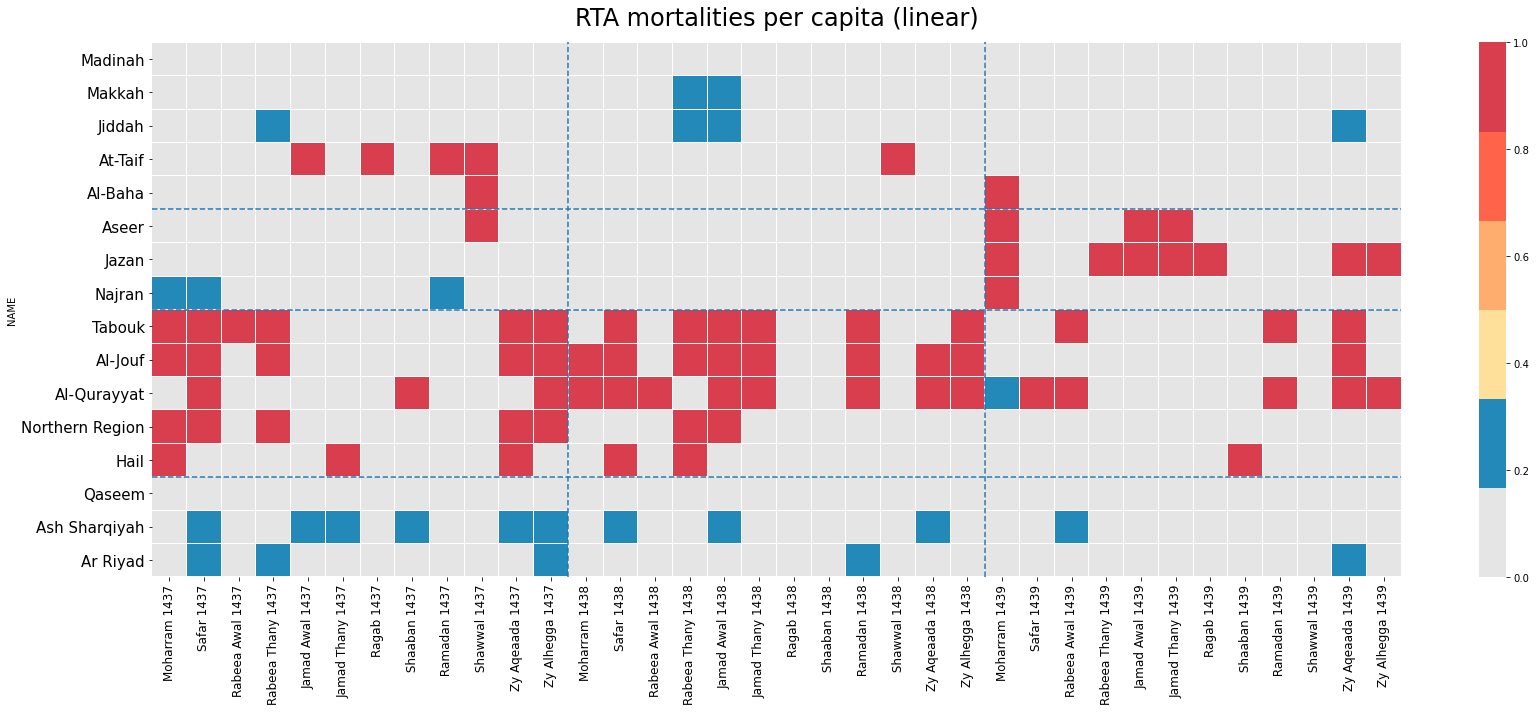

In [34]:
colors = ["#e5e5e5","#2389b9", "#fee09a" , "#fead6e" , "#ff644b" , "#d93e4e"]
fig,ax = plt.subplots(figsize = (2*12,10),facecolor='w')
sns.heatmap(heatmap_df_linear, ax=ax, cmap = sns.color_palette(colors), linewidths=0.01, linecolor="w",cbar=True)
plt.axvline(12, linestyle = '--')
plt.axvline(24, linestyle = '--')

plt.axhline(5, linestyle = '--')
plt.axhline(8, linestyle = '--')
plt.axhline(13, linestyle = '--')

ax.set_title('RTA mortalities per capita (linear)', size = 24, y = 1.02)
ax.set_xticklabels(ax.get_xticklabels() , size = 12)
ax.set_yticklabels(ax.get_yticklabels() , size = 15)

plt.tight_layout()
plt.savefig('./output/heatmaps/5n_RTA mortalities per capita_linear.jpg', dpi=300)

# Monthly involvment

# Perparing the dataset

In [35]:
#creating the ddatasets
inv_y1 = y1.pivot_table(index = 'region', columns = 'month', values = 'total number of people involved in RTA')[['Moharram', 'Safar', 'Rabeea Awal', 'Rabeea Thany', 'Jamad Awal',
       'Jamad Thany', 'Ragab', ' Shaaban', ' Ramadan', ' Shawwal',
       'Zy Aqeaada', 'Zy Alhegga']].reset_index()
inv_y2 = y2.pivot_table(index = 'region', columns = 'month', values = 'total number of people involved in RTA')[['Moharram', 'Safar', 'Rabeea Awal', 'Rabeea Thany', 'Jamad Awal',
       'Jamad Thany', 'Ragab', ' Shaaban', ' Ramadan', ' Shawwal',
       'Zy Aqeaada', 'Zy Alhegga']].reset_index()
inv_y3 = y3.pivot_table(index = 'region', columns = 'month', values = 'total number of people involved in RTA')[['Moharram', 'Safar', 'Rabeea Awal', 'Rabeea Thany', 'Jamad Awal',
       'Jamad Thany', 'Ragab', ' Shaaban', ' Ramadan', ' Shawwal',
       'Zy Aqeaada', 'Zy Alhegga']].reset_index()

In [36]:
#adding geometry to the datasets
overview = gpd.read_file('./overview.geojson')
inv_y1 = pd.merge(overview[['NAME','TOTPOP_CY','geometry']],inv_y1,
         left_on= 'NAME', right_on='region', right_index=False).drop(columns = 'region')
inv_y2 = pd.merge(overview[['NAME','TOTPOP_CY','geometry']],inv_y2,
         left_on= 'NAME', right_on='region', right_index=False).drop(columns = 'region')
inv_y3 = pd.merge(overview[['NAME','TOTPOP_CY','geometry']],inv_y3,
         left_on= 'NAME', right_on='region', right_index=False).drop(columns = 'region')

# Involvment heatmap

## Total number

### cross-sectional

In [37]:
months = ['Moharram', 'Safar', 'Rabeea Awal',
       'Rabeea Thany', 'Jamad Awal', 'Jamad Thany', 'Ragab', ' Shaaban',
       ' Ramadan', ' Shawwal', 'Zy Aqeaada', 'Zy Alhegga']

In [38]:
np.random.seed(1992)
w = weights.Kernel.from_dataframe(inv_y1, k=5, fixed = False, function = 'gaussian')
w.transform = 'r'

involvment_all = inv_y1[['NAME','geometry']].copy()

for month in months:
    for n,year in zip([1437,1438,1439],[inv_y1,inv_y2,inv_y3]):
        y = year[month].values
        moran_loc = Moran_Local(y, w)
        involvment_all['clustering'] = moran_loc.q
        involvment_all['p_sim'] = moran_loc.p_sim
        column = month + ' ' + str(n)
        involvment_all[column]= involvment_all['clustering'].map({1: 'HH', 2: 'LH', 3: 'LL', 4: 'HL'})
        involvment_all.loc[ (involvment_all.p_sim > 0.05) , column]= 'NS' 

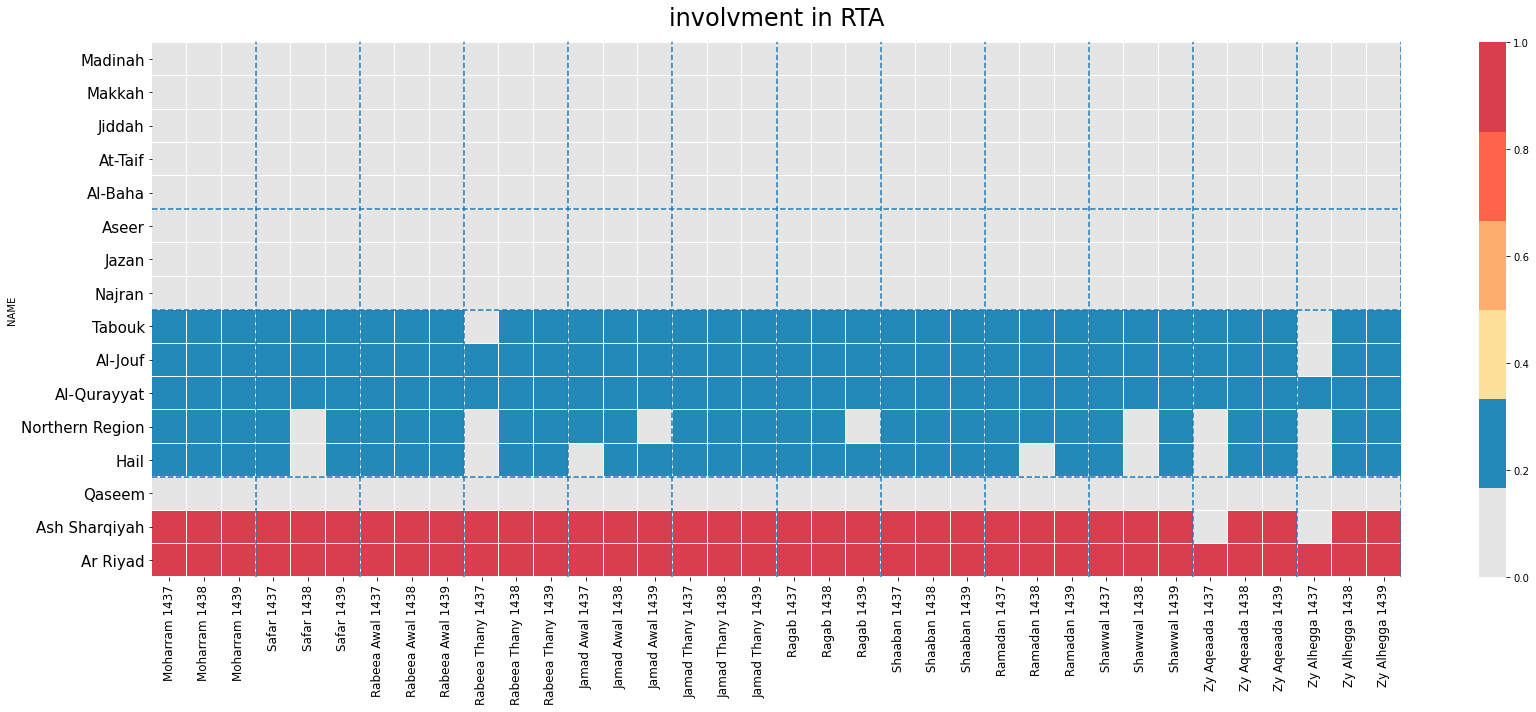

In [39]:
heatmap_df= involvment_all.drop(columns = ['geometry','clustering','p_sim']).copy()
heatmap_df.set_index('NAME', inplace = True)
heatmap_df.replace("NS",0, inplace = True)
heatmap_df.replace("LL",0.25, inplace = True)
heatmap_df.replace("LH",0.05, inplace = True)
heatmap_df.replace("HL",0.75, inplace = True)
heatmap_df.replace("HH",1.0, inplace = True)
heatmap_df = heatmap_df.loc[['Madinah','Makkah','Jiddah','At-Taif', 'Al-Baha','Aseer', 'Jazan', 'Najran','Tabouk', 
         'Al-Jouf', 'Al-Qurayyat', 'Northern Region','Hail','Qaseem','Ash Sharqiyah','Ar Riyad'],:]

colors = ["#e5e5e5","#2389b9", "#fee09a" , "#fead6e" , "#ff644b" , "#d93e4e"]
fig,ax = plt.subplots(figsize = (2*12,10),facecolor='w')
sns.heatmap(heatmap_df, ax=ax, cmap = sns.color_palette(colors), linewidths=0.01, linecolor="w",cbar=True)

for i in np.arange(3,37,3):
    plt.axvline(i, linestyle = '--')

plt.axhline(5, linestyle = '--')
plt.axhline(8, linestyle = '--')
plt.axhline(13, linestyle = '--')
    
ax.set_title('involvment in RTA', size = 24, y = 1.02)
ax.set_xticklabels(ax.get_xticklabels() , size = 12)
ax.set_yticklabels(ax.get_yticklabels() , size = 15)

plt.tight_layout()
plt.savefig('./output/heatmaps/5n_involvment in RTA.jpg', dpi=300)

### linear

In [40]:
year = 1437
linear = []
while year <1440:
    for month in months:
        linear.append(month+' '+ str(year))
    year +=1
    
heatmap_df_linear = heatmap_df[linear]

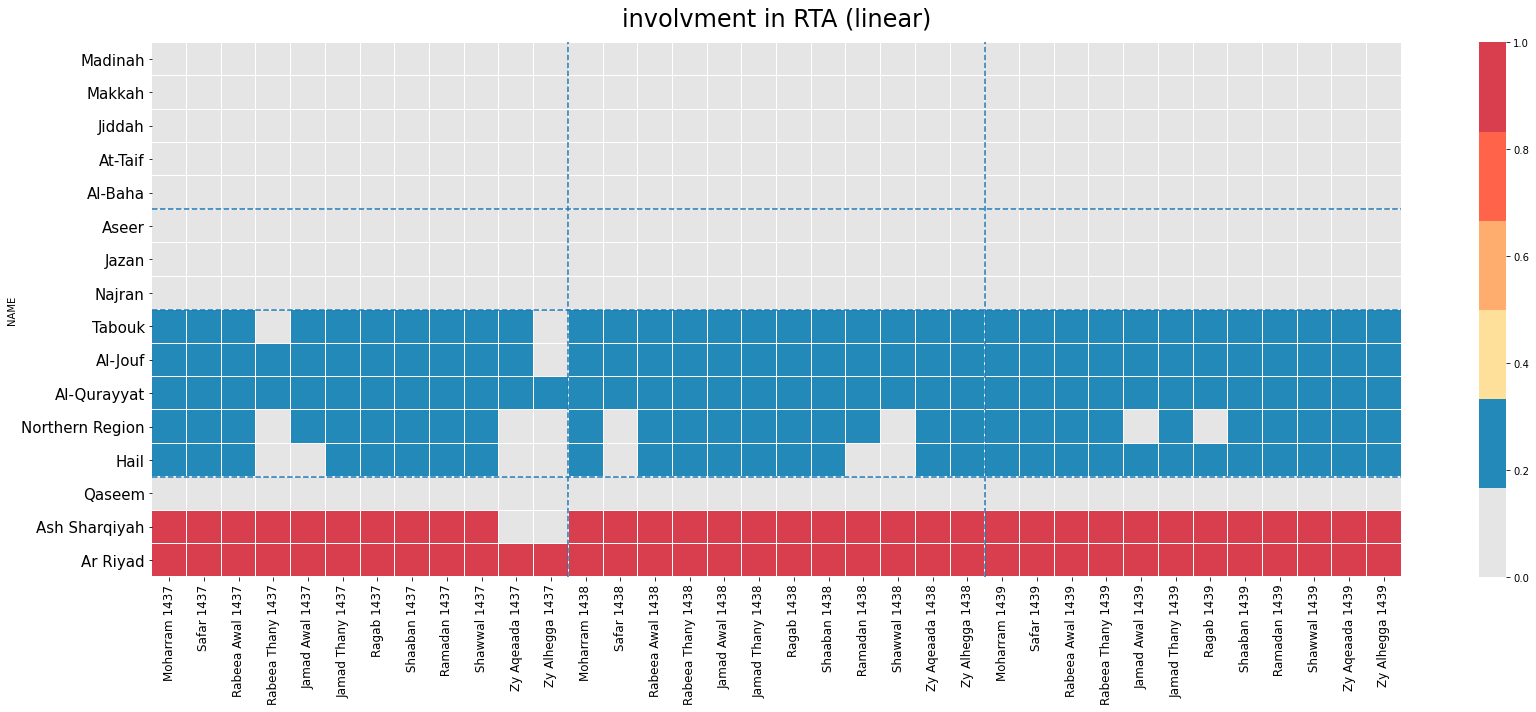

In [41]:
colors = ["#e5e5e5","#2389b9", "#fee09a" , "#fead6e" , "#ff644b" , "#d93e4e"]
fig,ax = plt.subplots(figsize = (2*12,10),facecolor='w')
sns.heatmap(heatmap_df_linear, ax=ax, cmap = sns.color_palette(colors), linewidths=0.01, linecolor="w",cbar=True)
plt.axvline(12, linestyle = '--')
plt.axvline(24, linestyle = '--')

plt.axhline(5, linestyle = '--')
plt.axhline(8, linestyle = '--')
plt.axhline(13, linestyle = '--')

ax.set_title('involvment in RTA (linear)', size = 24, y = 1.02)
ax.set_xticklabels(ax.get_xticklabels() , size = 12)
ax.set_yticklabels(ax.get_yticklabels() , size = 15)

plt.tight_layout()
plt.savefig('./output/heatmaps/5n_involvment in RTA_linear.jpg', dpi=300)

## Involvment Per capita

### corssectional

In [42]:
inv_y1_pc = inv_y1.copy()
inv_y2_pc = inv_y2.copy()
inv_y3_pc = inv_y3.copy()

#preparing the values so it is per 100,000 population
for i in np.arange(3,15):
    inv_y1_pc.iloc[:,i] = (inv_y1_pc.iloc[:,i]/ (inv_y1_pc.TOTPOP_CY))*100000
    inv_y2_pc.iloc[:,i] = (inv_y2_pc.iloc[:,i]/ (inv_y2_pc.TOTPOP_CY))*100000
    inv_y3_pc.iloc[:,i] = (inv_y3_pc.iloc[:,i]/ (inv_y3_pc.TOTPOP_CY))*100000

In [43]:
months = ['Moharram', 'Safar', 'Rabeea Awal',
       'Rabeea Thany', 'Jamad Awal', 'Jamad Thany', 'Ragab', ' Shaaban',
       ' Ramadan', ' Shawwal', 'Zy Aqeaada', 'Zy Alhegga']

np.random.seed(1992)
w = weights.Kernel.from_dataframe(inv_y1, k=5, fixed = False, function = 'gaussian')
w.transform = 'r'

involvment_all = inv_y1[['NAME','geometry']].copy()

for month in months:
    for n,year in zip([1437,1438,1439],[inv_y1_pc,inv_y2_pc,inv_y3_pc]):
        y = year[month].values
        moran_loc = Moran_Local(y, w )
        involvment_all['clustering'] = moran_loc.q
        involvment_all['p_sim'] = moran_loc.p_sim
        column = month + ' ' + str(n)
        involvment_all[column]= involvment_all['clustering'].map({1: 'HH', 2: 'LH', 3: 'LL', 4: 'HL'})
        involvment_all.loc[ (involvment_all.p_sim > 0.05) , column]= 'NS' 

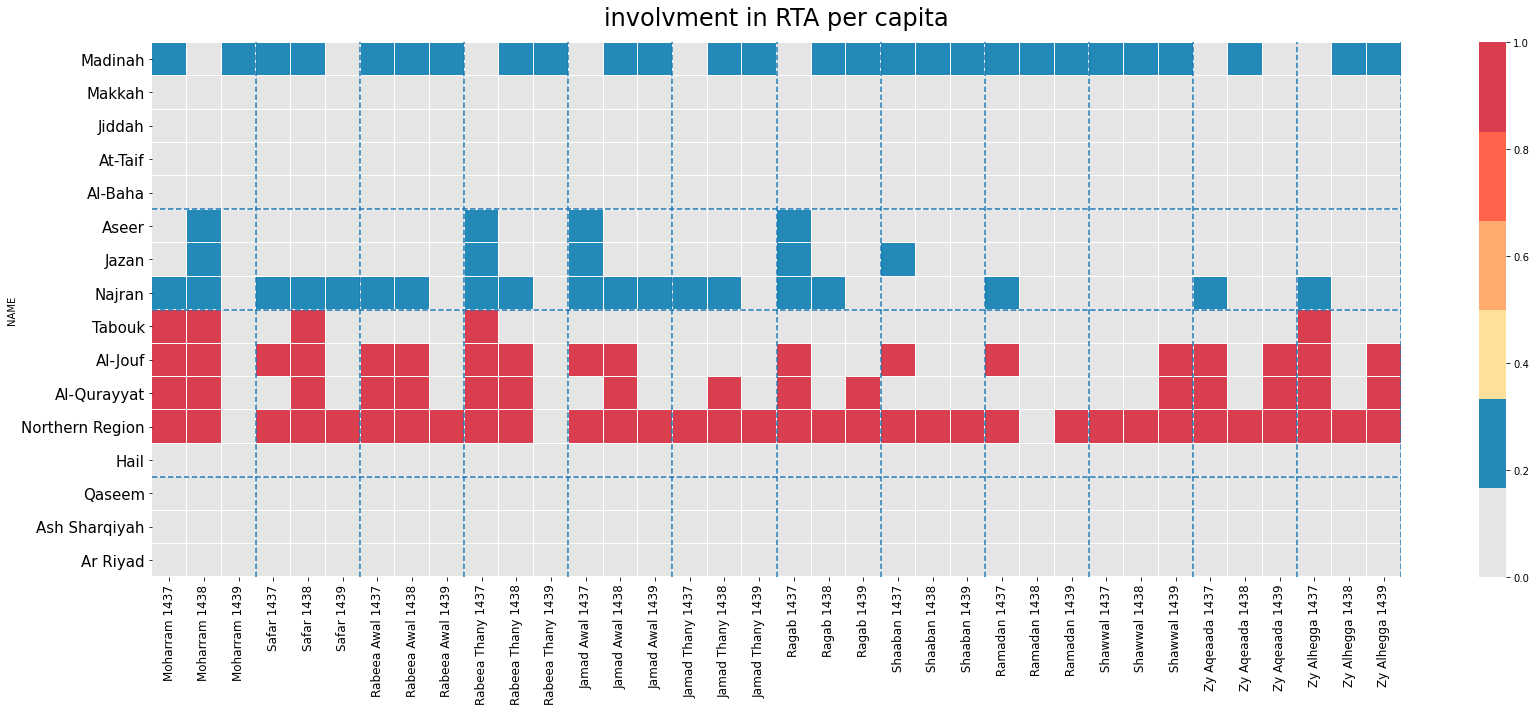

In [44]:
heatmap_df= involvment_all.drop(columns = ['geometry','clustering','p_sim']).copy()
heatmap_df.set_index('NAME', inplace = True)
heatmap_df.replace("NS",0, inplace = True)
heatmap_df.replace("LL",0.25, inplace = True)
heatmap_df.replace("LH",0.05, inplace = True)
heatmap_df.replace("HL",0.75, inplace = True)
heatmap_df.replace("HH",1.0, inplace = True)
heatmap_df = heatmap_df.loc[['Madinah','Makkah','Jiddah','At-Taif', 'Al-Baha','Aseer', 'Jazan', 'Najran','Tabouk', 
         'Al-Jouf', 'Al-Qurayyat', 'Northern Region','Hail','Qaseem','Ash Sharqiyah','Ar Riyad'],:]

colors = ["#e5e5e5","#2389b9", "#fee09a" , "#fead6e" , "#ff644b" , "#d93e4e"]
fig,ax = plt.subplots(figsize = (2*12,10),facecolor='w')
sns.heatmap(heatmap_df, ax=ax, cmap = sns.color_palette(colors), linewidths=0.01, linecolor="w",cbar=True)
for i in np.arange(3,37,3):
    plt.axvline(i, linestyle = '--')
    
plt.axhline(5, linestyle = '--')
plt.axhline(8, linestyle = '--')
plt.axhline(13, linestyle = '--')
    
ax.set_title('involvment in RTA per capita', size = 24, y = 1.02)
ax.set_xticklabels(ax.get_xticklabels() , size = 12)
ax.set_yticklabels(ax.get_yticklabels() , size = 15)

plt.tight_layout()
plt.savefig('./output/heatmaps/5n_involvment in RTA per capita.jpg', dpi=300)

### linear

In [45]:
year = 1437
linear = []
while year <1440:
    for month in months:
        linear.append(month+' '+ str(year))
    year +=1
    
heatmap_df_linear = heatmap_df[linear]

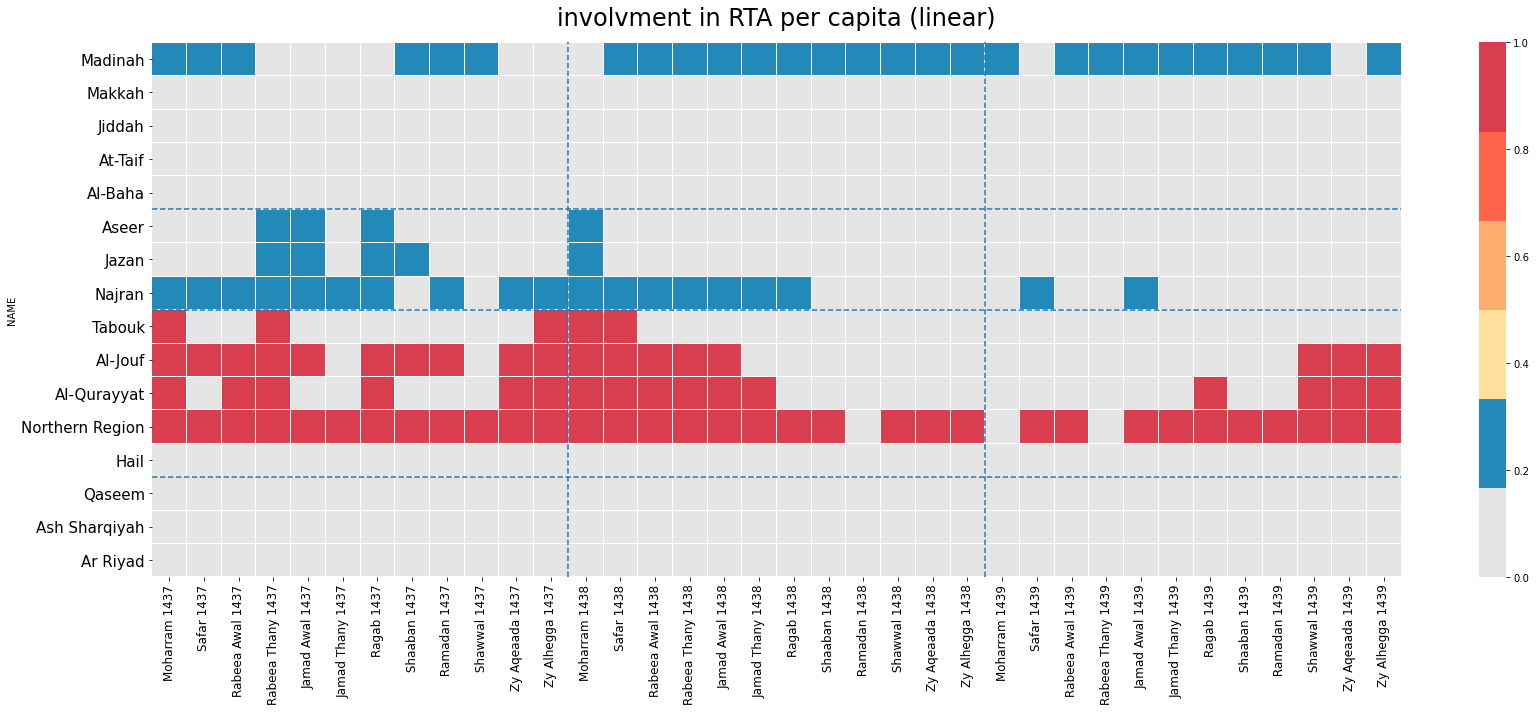

In [46]:
colors = ["#e5e5e5","#2389b9", "#fee09a" , "#fead6e" , "#ff644b" , "#d93e4e"]
fig,ax = plt.subplots(figsize = (2*12,10),facecolor='w')
sns.heatmap(heatmap_df_linear, ax=ax, cmap = sns.color_palette(colors), linewidths=0.01, linecolor="w",cbar=True)
plt.axvline(12, linestyle = '--')
plt.axvline(24, linestyle = '--')

plt.axhline(5, linestyle = '--')
plt.axhline(8, linestyle = '--')
plt.axhline(13, linestyle = '--')

ax.set_title('involvment in RTA per capita (linear)', size = 24, y = 1.02)
ax.set_xticklabels(ax.get_xticklabels() , size = 12)
ax.set_yticklabels(ax.get_yticklabels() , size = 15)

plt.tight_layout()
plt.savefig('./output/heatmaps/5n_involvment in RTA per capita_linear.jpg', dpi=300)